# Data Science Regression Project: Predicting Home Prices in Delhi

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

### Data Load: Loading Delhi home prices into a dataframe

In [2]:
df=pd.read_csv('Delhi.csv',encoding='latin1')
df

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000,"Noida Extension, Noida, Delhi NCR",1350,28.608850,77.460560,3,3,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,28.374236,76.952416,3,3,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,28.645769,77.385110,4,5,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,28.566914,77.436434,2,2,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,28.520732,77.356491,2,2,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000,"Indirapuram, Ghaziabad, Delhi NCR",1095,28.635272,77.370395,2,2,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060,28.581431,77.452819,2,2,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000,"Crossings Republik, Ghaziabad, Delhi NCR",1898,28.625850,77.435336,4,3,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400,28.701622,77.430153,3,3,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143


In [3]:
df.shape

(7738, 18)

Drop features that are not required to build our model

In [4]:
df=df.drop(['Unnamed: 0','latitude','longitude','Status','desc','Landmarks','neworold','Balcony','parking','Lift'],axis=1)
df

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
0,5600000,"Noida Extension, Noida, Delhi NCR",1350,3,3,NaN,Flat,4148.148148
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,3,3,Semi-Furnished,Flat,5906.040268
2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,4,5,Unfurnished,Flat,6918.238994
3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,2,2,Unfurnished,Flat,3628.571429
4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,2,2,NaN,Flat,4592.592593
...,...,...,...,...,...,...,...,...
7733,7900000,"Indirapuram, Ghaziabad, Delhi NCR",1095,2,2,NaN,Flat,7214.611872
7734,4510000,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060,2,2,Semi-Furnished,Flat,4254.716981
7735,7000000,"Crossings Republik, Ghaziabad, Delhi NCR",1898,4,3,NaN,Flat,3688.092729
7736,6500000,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400,3,3,NaN,Flat,4642.857143


In [5]:
df.groupby('type_of_building')['type_of_building'].agg('count')

type_of_building
Flat                6226
Individual House    1512
Name: type_of_building, dtype: int64

### Data Cleaning: Handle NA values

In [6]:
df.isnull().sum()

price                  0
Address                0
area                   0
Bedrooms               0
Bathrooms              0
Furnished_status    3614
type_of_building       0
Price_sqft             0
dtype: int64

In [7]:
df=df.fillna('Unknown')
df

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
0,5600000,"Noida Extension, Noida, Delhi NCR",1350,3,3,Unknown,Flat,4148.148148
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,3,3,Semi-Furnished,Flat,5906.040268
2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,4,5,Unfurnished,Flat,6918.238994
3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050,2,2,Unfurnished,Flat,3628.571429
4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,2,2,Unknown,Flat,4592.592593
...,...,...,...,...,...,...,...,...
7733,7900000,"Indirapuram, Ghaziabad, Delhi NCR",1095,2,2,Unknown,Flat,7214.611872
7734,4510000,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060,2,2,Semi-Furnished,Flat,4254.716981
7735,7000000,"Crossings Republik, Ghaziabad, Delhi NCR",1898,4,3,Unknown,Flat,3688.092729
7736,6500000,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400,3,3,Unknown,Flat,4642.857143


In [8]:
df.isnull().sum()

price               0
Address             0
area                0
Bedrooms            0
Bathrooms           0
Furnished_status    0
type_of_building    0
Price_sqft          0
dtype: int64

In [9]:
df.dtypes

price                 int64
Address              object
area                  int64
Bedrooms              int64
Bathrooms             int64
Furnished_status     object
type_of_building     object
Price_sqft          float64
dtype: object

# Feature Engineering 

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [10]:
df.Address = df.Address.apply(lambda x:x.strip())
address_stats = df.groupby('Address')['Address'].agg('count').sort_values(ascending=False)
address_stats

Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                            163
Indirapuram, Ghaziabad, Delhi NCR                                    152
Greater Noida West, Greater Noida, Delhi NCR                         100
Noida Extension, Noida, Delhi NCR                                     63
Crossings Republik, Ghaziabad, Delhi NCR                              61
                                                                    ... 
Godrej woods sector 43, Sector 43, Noida, Delhi NCR                    1
Golf Course Road, Gurgaon, Delhi NCR                                   1
Golf Course Road, Gurgaon, South City 1, Gurgaon, Delhi NCR            1
Golf course Ex-road sec 68 gurgaon, Sector 68, Gurgaon, Delhi NCR      1
zeta 1, Zeta 1, Greater Noida, Delhi NCR                               1
Name: Address, Length: 4145, dtype: int64

In [11]:
len(address_stats[address_stats<10])

4041

# Dimensionality Reduction

#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [12]:
address_stats_less_than_10 = address_stats[address_stats<10]
address_stats_less_than_10

Address
Mehrauli, New Delhi - South, Delhi NCR                               9
Pratap Vihar, Ghaziabad, Delhi NCR                                   9
Sector 76, Noida, Sector 76, Noida, Delhi NCR                        9
Wave City, Ghaziabad, Delhi NCR                                      9
Mahavir Enclave Part 1, New Delhi - Dwarka, Delhi NCR                9
                                                                    ..
Godrej woods sector 43, Sector 43, Noida, Delhi NCR                  1
Golf Course Road, Gurgaon, Delhi NCR                                 1
Golf Course Road, Gurgaon, South City 1, Gurgaon, Delhi NCR          1
Golf course Ex-road sec 68 gurgaon, Sector 68, Gurgaon, Delhi NCR    1
zeta 1, Zeta 1, Greater Noida, Delhi NCR                             1
Name: Address, Length: 4041, dtype: int64

In [13]:
len(df.Address.unique())

4145

In [14]:
df.Address = df.Address.apply(lambda x:'other' if x in address_stats_less_than_10 else x)
len(df.Address.unique())

105

### Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 200 (i.e. 2 bhk apartment is minimum 400 sqft. If you have for example 300 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 200 sqft

In [15]:
df[df.area/df.Bedrooms<200].head()

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
806,5000000,other,890,5,2,Unknown,Flat,5617.977528
1094,14000000,other,720,8,4,Semi-Furnished,Flat,19444.444440
1375,22500000,other,507,10,6,Unfurnished,Individual House,44378.698220
1762,2800000,other,540,3,2,Unfurnished,Flat,5185.185185
1869,5000000,other,900,5,2,Unfurnished,Flat,5555.555556


Check above data points. We have 10 bhk apartment with 507 sqft. Another one is 8 bhk and total sqft is 720. These are clear data errors that can be removed safely

In [16]:
df.shape

(7738, 8)

In [17]:
df2 = df[~(df.area/df.Bedrooms<200)]
df2.shape

(7696, 8)

## Outlier Removal Using Standard Deviation and Mean

In [18]:
df.Price_sqft.describe()

count     7738.000000
mean      5543.660241
std       2408.659307
min       2100.000000
25%       3950.986915
50%       4972.674332
75%       6350.638693
max      44378.698220
Name: Price_sqft, dtype: float64

Here we find that min price per sqft is 2100 rs/sqft whereas max is 44378 rs/sqft , this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

Text(0, 0.5, 'Count')

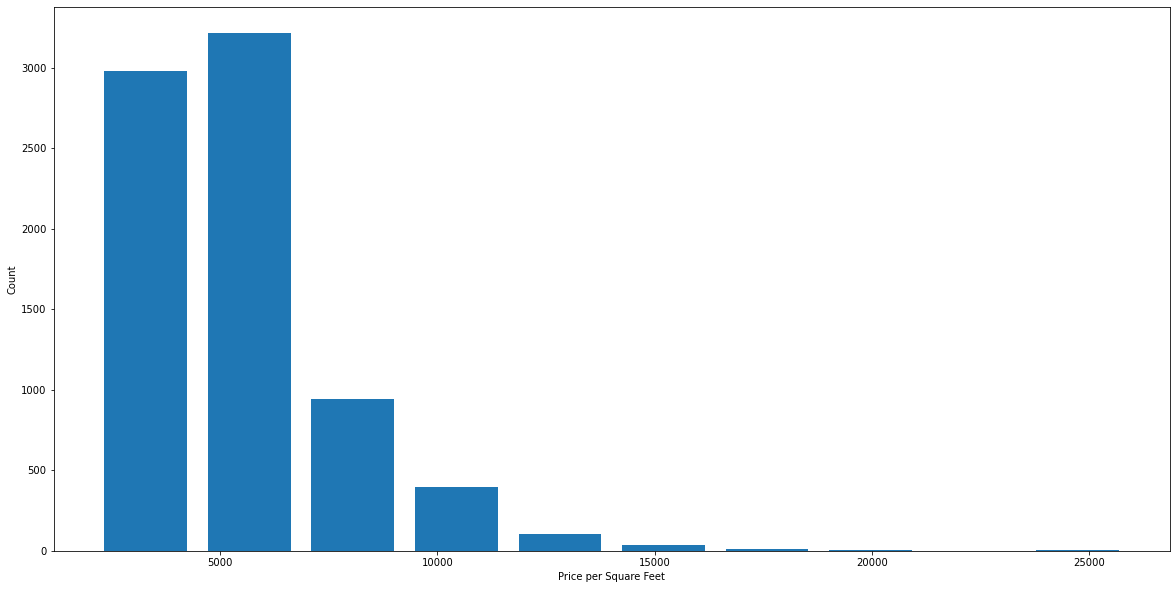

In [19]:
plt.hist(df2.Price_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [20]:
df2.Bathrooms.unique()

array([ 3,  5,  2,  4,  6, 10,  7,  8,  9], dtype=int64)

In [21]:
df2[df2.Bathrooms>8]

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
151,45000000,other,9000,10,10,Unfurnished,Flat,5000.000000
2252,46000000,other,5400,9,9,Semi-Furnished,Individual House,8518.518519
2805,6300000,other,1500,5,10,Unfurnished,Flat,4200.000000
2902,35000000,other,5200,5,9,Semi-Furnished,Individual House,6730.769231
2993,45000000,other,6800,9,9,Furnished,Flat,6617.647059
3239,50000000,other,5000,9,9,Semi-Furnished,Flat,10000.000000
3263,41000000,other,6500,9,9,Semi-Furnished,Flat,6307.692308
3389,45000000,other,6500,9,9,Unfurnished,Flat,6923.076923
5911,11500000,other,2000,9,9,Furnished,Flat,5750.000000
6231,33500000,other,2800,8,9,Furnished,Flat,11964.285710


Text(0, 0.5, 'Count')

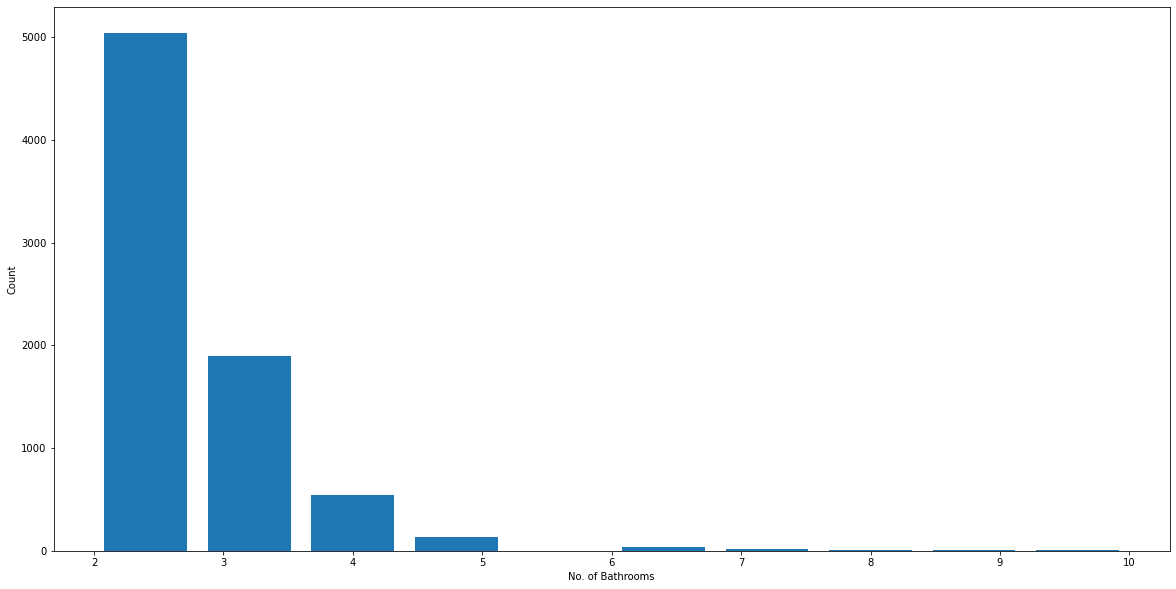

In [22]:
plt.hist(df2.Bathrooms,rwidth=0.8)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")

### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [23]:
df2[df2.Bathrooms>=df2.Bedrooms+2]

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
123,26000000,other,3755,4,6,Unknown,Flat,6924.101198
473,42500000,other,4500,3,5,Semi-Furnished,Flat,9444.444444
602,22800000,other,2750,3,5,Unknown,Individual House,8290.909091
756,8000000,other,900,2,4,Furnished,Flat,8888.888889
1064,12000000,other,2025,3,5,Semi-Furnished,Flat,5925.925926
1842,6500000,other,1742,3,5,Semi-Furnished,Individual House,3731.343284
2021,13000000,other,2525,4,6,Semi-Furnished,Flat,5148.514851
2249,30000000,other,4000,5,7,Semi-Furnished,Flat,7500.000000
2270,7000000,other,900,2,4,Unfurnished,Flat,7777.777778
2299,45000000,other,5000,4,7,Furnished,Flat,9000.000000


##### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [24]:
df3 = df2[df2.Bathrooms<=df2.Bedrooms+2]
df3

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft
0,5600000,"Noida Extension, Noida, Delhi NCR",1350,3,3,Unknown,Flat,4148.148148
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,3,3,Semi-Furnished,Flat,5906.040268
2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,4,5,Unfurnished,Flat,6918.238994
3,3810000,other,1050,2,2,Unfurnished,Flat,3628.571429
4,6200000,other,1350,2,2,Unknown,Flat,4592.592593
...,...,...,...,...,...,...,...,...
7733,7900000,"Indirapuram, Ghaziabad, Delhi NCR",1095,2,2,Unknown,Flat,7214.611872
7734,4510000,other,1060,2,2,Semi-Furnished,Flat,4254.716981
7735,7000000,"Crossings Republik, Ghaziabad, Delhi NCR",1898,4,3,Unknown,Flat,3688.092729
7736,6500000,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400,3,3,Unknown,Flat,4642.857143


## Use One Hot Encoding For Location

In [25]:
dummies = pd.get_dummies(df3.Address)
dummies.head()

,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","DLF Ankur Vihar, Ghaziabad, Delhi NCR","Dwarka Mor, New Delhi - West, Delhi NCR","Eta 2, Greater Noida, Delhi NCR","Govindpuram, Ghaziabad, Delhi NCR","Greater Noida West, Greater Noida, Delhi NCR",...,"Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR",other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df4 = pd.concat([df3,dummies.drop('other',axis=1)],axis=1)
df4.head()

,price,Address,area,Bedrooms,Bathrooms,Furnished_status,type_of_building,Price_sqft,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR",...,"Sohna Road, Gurgaon, Delhi NCR","Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,5600000,"Noida Extension, Noida, Delhi NCR",1350,3,3,Unknown,Flat,4148.148148,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,3,3,Semi-Furnished,Flat,5906.040268,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,4,5,Unfurnished,Flat,6918.238994,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3810000,other,1050,2,2,Unfurnished,Flat,3628.571429,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6200000,other,1350,2,2,Unknown,Flat,4592.592593,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df5 = df4.drop(['Address','Furnished_status','type_of_building'],axis=1)
df5.head()

,price,area,Bedrooms,Bathrooms,Price_sqft,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR",...,"Sohna Road, Gurgaon, Delhi NCR","Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,5600000,1350,3,3,4148.148148,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8800000,1490,3,3,5906.040268,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16500000,2385,4,5,6918.238994,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3810000,1050,2,2,3628.571429,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6200000,1350,2,2,4592.592593,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df5.shape

(7689, 109)

In [29]:
X = df5.drop(['price',],axis=1)
X.head()

,area,Bedrooms,Bathrooms,Price_sqft,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chi 5, Greater Noida, Delhi NCR","Crossings Republik, Ghaziabad, Crossings Republik, Ghaziabad, Delhi NCR","Crossings Republik, Ghaziabad, Delhi NCR","DLF Ankur Vihar, Ghaziabad, Delhi NCR",...,"Sohna Road, Gurgaon, Delhi NCR","Surajpur, Greater Noida, Delhi NCR","Techzone 4, Greater Noida, Delhi NCR","Uttam Nagar West, New Delhi - West, Delhi NCR","Uttam Nagar, New Delhi - West, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Vikaspuri, New Delhi - West, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR"
0,1350,3,3,4148.148148,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1490,3,3,5906.040268,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2385,4,5,6918.238994,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1050,2,2,3628.571429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1350,2,2,4592.592593,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = df5.price
y.head()

0     5600000
1     8800000
2    16500000
3     3810000
4     6200000
Name: price, dtype: int64

In [31]:
len(y)

7689

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9401955097371496

In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.94519829, 0.94164684, 0.94112732, 0.94611799, 0.95494028])

In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.945806,{'normalize': True}
1,lasso,0.945807,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.994355,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [36]:
def predict_price(Address,area,Bathrooms,Bedrooms):    
    loc_index = np.where(X.columns==Address)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = Bathrooms
    x[2] = Bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [37]:
predict_price('Raj Nagar Extension, Ghaziabad, Delhi NCR',2000, 3, 4)

4540124.3772636615

In [38]:
predict_price('Bhopura, Ghaziabad, Delhi NCR',2500, 2, 2)

8444398.681118824